In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from surprise import Dataset 
from surprise import Reader
from surprise import SVD
from surprise import KNNBasic
from surprise import accuracy
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

In [2]:
reader = Reader(line_format = "user item rating timestamp", sep = ',', skip_lines = 1)
data = Dataset.load_from_file("ratings_small.csv", reader = reader)

In [3]:
rmsePMF = []
maePMF = []
rmseUB = []
maeUB = []
rmseIB = []
maeIB = []

In [4]:
algo = SVD(biased = False)
crossVal_PMF = cross_validate(algo, data, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0059  1.0113  1.0095  1.0200  0.9989  1.0091  0.0069  
MAE (testset)     0.7735  0.7798  0.7767  0.7903  0.7727  0.7786  0.0064  
Fit time          0.33    0.34    0.35    0.33    0.34    0.34    0.01    
Test time         0.06    0.03    0.06    0.03    0.03    0.04    0.02    


In [5]:
algo = KNNBasic(sim_options = {'user_based' : True })
crossVal_UBCF = cross_validate(algo, data, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9695  0.9622  0.9741  0.9694  0.9667  0.9684  0.0039  
MAE (testset)     0.7469  0.7398  0.7494  0.7446  0.7417  0.7445  0.0035  
Fit time          0.03    0.03    0.03    0.03    0.03    0.03    0.00    
Test time         0.44    0.35    0.39    0.36    0.39    0.39    0.03    


In [6]:
algo = KNNBasic(sim_options = {'user_based' : False })
crossVal_IBCF = cross_validate(algo, data, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9370  0.9343  0.9326  0.9353  0.9347  0.9348  0.0014  
MAE (testset)     0.7231  0.7207  0.7218  0.7198  0.7203  0.7211  0.0012  
Fit time          0.85    0.83    0.76    0.74    0.73    0.78    0.05    
Test time         1.54    1.54    1.58    1.53    1.52    1.54    0.02    


In [7]:
rmsePMF.append(crossVal_PMF['test_rmse'].mean())
maePMF.append(crossVal_PMF['test_mae'].mean())
print("rmsePMF:" , rmsePMF)
print("maePMF:",maePMF)

rmsePMF: [1.0091230847859864]
maePMF: [0.7786069084772562]


In [30]:
rmseUB.append(crossVal_UBCF['test_rmse'].mean())
maeUB.append(crossVal_UBCF['test_mae'].mean())
print("rmseUB:" , rmseUB)
print("maeUB:" , maeUB)

rmseUB: [0.9683744114988961]
maeUB: [0.7444747972250824]


In [35]:
rmseIB.append(crossVal_IBCF['test_rmse'].mean())
maeIB.append(crossVal_IBCF['test_mae'].mean())
print("rmseIB:" , rmseIB)
print("maeIB:" , maeIB)

rmseIB: [0.9347752723197097]
maeIB: [0.7211277207215584]


In [10]:
algoCosine_UB = KNNBasic(sim_options = {'name' : 'cosine', 'user_based' : True})
CVCosineUB = cross_validate(algoCosine_UB, data, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)
algoMSD_UB = KNNBasic(sim_options = {'user_based' : True})
crossValMSD_UB = cross_validate(algoMSD_UB, data, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)
algoPearson_UB = KNNBasic(sim_options = {'name' : 'pearson_baseline', 'user_based' : True})
crossValPearson_UB = cross_validate(algoPearson_UB, data, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

algoCosine_IB = KNNBasic(sim_options = {'name' : 'cosine', 'user_based' : False})
CVCosineIB = cross_validate(algoCosine_IB, data, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)
algoMSD_IB = KNNBasic(sim_options = {'user_based' : False})
crossValMSD_IB = cross_validate(algoMSD_IB, data, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)
algoPearson_IB = KNNBasic(sim_options = {'name' : 'pearson_baseline', 'user_based' : False})
crossValPearson_IB = cross_validate(algoPearson_IB, data, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9938  0.9868  0.9939  0.9917  0.9939  0.9920  0.0027  
MAE (testset)     0.7659  0.7645  0.7678  0.7678  0.7667  0.7665  0.0012  
Fit time          0.04    0.04    0.04    0.04    0.04    0.04    0.00    
Test time         0.38    0.34    0.39    0.34    0.34    0.36    0.02    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
D

In [11]:
rmseUB_PLOT = []
maeUB_PLOT = []
rmseUB_PLOT.append(CVCosineUB['test_rmse'].mean())
rmseUB_PLOT.append(crossValMSD_UB['test_rmse'].mean())
rmseUB_PLOT.append(crossValPearson_UB['test_rmse'].mean())
maeUB_PLOT.append(CVCosineUB['test_mae'].mean())
maeUB_PLOT.append(crossValMSD_UB['test_mae'].mean())
maeUB_PLOT.append(crossValPearson_UB['test_mae'].mean())

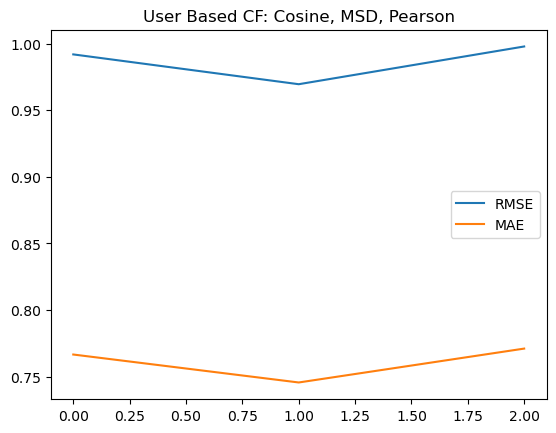

In [12]:
plt.title("User Based CF: Cosine, MSD, Pearson")
plt.plot(rmseUB_PLOT, label = 'RMSE')
plt.plot(maeUB_PLOT, label = 'MAE')
plt.legend()

In [13]:
rmseIB_PLOT = []
maeIB_PLOT = []
rmseIB_PLOT.append(CVCosineIB['test_rmse'].mean())
rmseIB_PLOT.append(crossValMSD_IB['test_rmse'].mean())
rmseIB_PLOT.append(crossValPearson_IB['test_rmse'].mean())
maeIB_PLOT.append(CVCosineIB['test_mae'].mean())
maeIB_PLOT.append(crossValMSD_IB['test_mae'].mean())
maeIB_PLOT.append(crossValPearson_IB['test_mae'].mean())

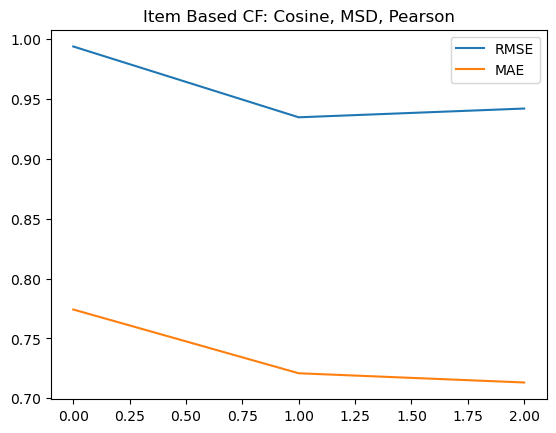

In [14]:
plt.title("Item Based CF: Cosine, MSD, Pearson")
plt.plot(rmseIB_PLOT, label = 'RMSE')
plt.plot(maeIB_PLOT, label = 'MAE')
plt.legend()

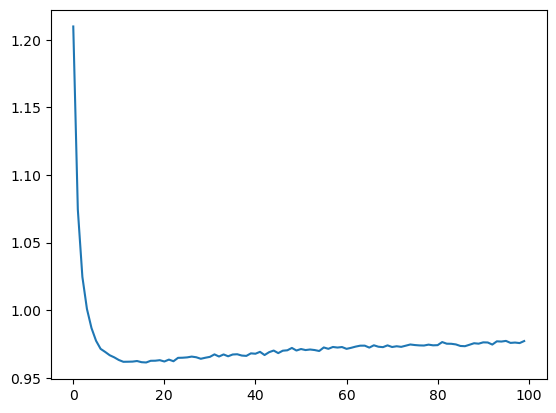

In [15]:
Range = range(1,101)
User = []

for i in Range:
        algo = KNNBasic(k = i, sim_options = {'user_based' : True }, verbose = False)
        crossValUser = cross_validate(algo, data, measures=['rmse', 'mae'],cv = 5,verbose = False)
        User.append(crossValUser['test_rmse'].mean())
        
plt.plot(User)

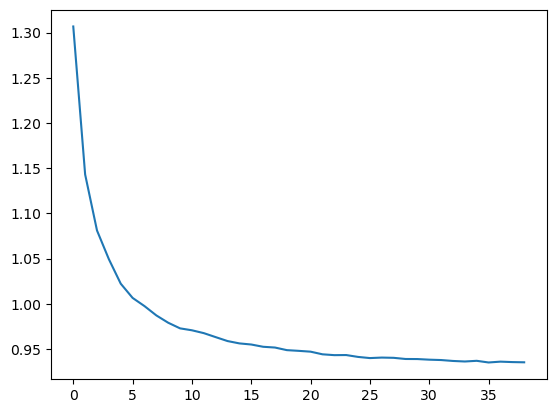

In [19]:
Range = range(1,40)
Item = []

for i in Range:
        algo = KNNBasic(k = i, sim_options = {'user_based' : False }, verbose = False)
        crossValItem = cross_validate(algo, data, measures=['rmse', 'mae'],cv = 5,verbose = False)
        Item.append(crossValItem['test_rmse'].mean())
        
plt.plot(Item)

In [20]:
User.index(min(User))

16

In [21]:
Item.index(min(Item))

35